In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#to get the stocks data as dataframe
data = pd.read_csv('datasets/top_pick_stocks.csv')

In [4]:
data.columns

Index(['S.No.', 'Name', 'CMP Rs. ', 'P/E ', 'Mar Cap Rs.Cr. ', 'Div Yld % ',
       'NP Qtr Rs.Cr. ', 'Sales Qtr Rs.Cr. ', 'Profit growth % ',
       '6mth return % ', '3mth return % ', 'Sales Prev Qtr Rs.Cr. ',
       'NP 2Qtr Bk Rs.Cr. ', 'NP 3Qtr Bk Rs.Cr. ', 'NP Prev Qtr Rs.Cr. ',
       'Sales growth % ', 'Sales 2Qtr Bk Rs.Cr. ', 'Sales 3Qtr Bk Rs.Cr. ',
       'ROE 5Yr % ', 'Sales Var 5Yrs % ', 'ROCE % ', 'Dep Qtr Rs.Cr. ',
       'Dep Prev Qtr Rs.Cr. ', 'Tax Qtr Rs.Cr. ', 'Tax Prev Qtr Rs.Cr. ',
       'OP Prev Qtr Rs.Cr. ', 'OP 2Qtr Bk Rs.Cr. ', 'OP 3Qtr Bk Rs.Cr. ',
       'OP Qtr Rs.Cr. '],
      dtype='object')

In [5]:
data.head()

,S.No.,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Profit growth %,6mth return %,...,Sales Var 5Yrs %,ROCE %,Dep Qtr Rs.Cr.,Dep Prev Qtr Rs.Cr.,Tax Qtr Rs.Cr.,Tax Prev Qtr Rs.Cr.,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.
0,1,Remedium Life,523.20,123.80,1054.75,0.00,6.53,468.57,-12.44,-27.37,...,329.21,102.61,0.01,0.01,3.88,2.02,7.28,-2.90,1.53,6.34
1,2,Waaree Renewab.,2865.55,89.57,5968.91,0.04,18.29,150.06,166.56,109.44,...,180.25,83.80,1.67,1.41,22.10,6.83,28.09,15.98,22.29,87.81
2,3,Dreamfolks Servi,530.85,36.70,2773.73,0.09,18.14,282.47,74.03,-30.91,...,36.03,76.91,0.92,0.86,6.14,4.70,17.78,33.74,26.05,24.93
3,4,Jyoti Resins,1540.30,30.58,1848.36,0.38,16.18,62.96,103.67,10.39,...,37.11,72.90,0.27,0.27,5.76,5.30,20.74,20.05,16.33,21.4
4,5,Esab India,5598.50,54.22,8616.09,1.39,38.41,303.14,62.52,20.95,...,14.99,70.68,3.40,3.34,13.64,14.50,57.79,56.71,48.43,54.4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No.                   74 non-null     int64  
 1   Name                    74 non-null     object 
 2   CMP Rs.                 74 non-null     float64
 3   P/E                     74 non-null     float64
 4   Mar Cap Rs.Cr.          74 non-null     float64
 5   Div Yld %               74 non-null     float64
 6   NP Qtr Rs.Cr.           74 non-null     float64
 7   Sales Qtr Rs.Cr.        74 non-null     float64
 8   Profit growth %         74 non-null     float64
 9   6mth return %           71 non-null     object 
 10  3mth return %           72 non-null     float64
 11  Sales Prev Qtr Rs.Cr.   73 non-null     float64
 12  NP 2Qtr Bk Rs.Cr.       72 non-null     float64
 13  NP 3Qtr Bk Rs.Cr.       71 non-null     float64
 14  NP Prev Qtr Rs.Cr.      73 non-null     floa

#### From above data we can see, name alone is in actual object and is data too is in object type and all others are numerical fields in which few are wrongly stored as object type, for which pre-processing is needed

In [7]:
#get the object columns to perform type conversion
obj_columns = data.drop("Name",axis=1).select_dtypes("object").columns

for col in obj_columns:
    #to clean data removing unwanted string quotations like ',' which might be there in amount fileds
    data[col] = data[col].str.replace('"', '')
    data[col] = pd.to_numeric(data[col])##convertion from object/text to numeric

###### since S.No is just for sequensing and doesn't help in any understanding, will be droping that

In [8]:
data.drop('S.No.',axis=1,inplace=True)

##### to get to know on the columns with missing values

In [9]:
missing_data_cols = data.columns[data.isna().sum() != 0]
print(missing_data_cols)

Index(['6mth return % ', '3mth return % ', 'Sales Prev Qtr Rs.Cr. ',
       'NP 2Qtr Bk Rs.Cr. ', 'NP 3Qtr Bk Rs.Cr. ', 'NP Prev Qtr Rs.Cr. ',
       'Sales 2Qtr Bk Rs.Cr. ', 'Sales 3Qtr Bk Rs.Cr. ', 'Dep Qtr Rs.Cr. ',
       'Dep Prev Qtr Rs.Cr. ', 'Tax Qtr Rs.Cr. ', 'Tax Prev Qtr Rs.Cr. ',
       'OP Prev Qtr Rs.Cr. ', 'OP 2Qtr Bk Rs.Cr. ', 'OP 3Qtr Bk Rs.Cr. '],
      dtype='object')


In [10]:
#to get only the rows with missing data
data[data[missing_data_cols].isnull().any(axis=1)]

,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Profit growth %,6mth return %,3mth return %,...,Sales Var 5Yrs %,ROCE %,Dep Qtr Rs.Cr.,Dep Prev Qtr Rs.Cr.,Tax Qtr Rs.Cr.,Tax Prev Qtr Rs.Cr.,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.
29,Flair Writing,341.4,32.21,3598.17,0.0,33.35,244.31,107.13,NaN,NaN,...,12.40,33.56,7.29,6.85,11.19,10.59,47.70,NaN,NaN,50.78
45,Concord Biotech,1392.8,61.91,14570.94,0.0,84.49,262.35,34.75,NaN,18.33,...,20.24,26.17,13.30,13.04,28.69,16.54,72.15,129.06,NaN,119.18
46,Happy Forgings,944.6,42.63,8898.58,0.0,119.30,672.90,46.65,NaN,NaN,...,16.80,26.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.21


###### it can be seen that, only data for three companies is having null entries.
##### will drop those below

In [11]:
indexes_na_data = data[data[missing_data_cols].isnull().any(axis=1)].index
print(indexes_na_data)

Index([29, 45, 46], dtype='int64')


In [12]:
#since this is for expected profit/sales calculation using earlier profit/sales data, 
#missing values can't be imputed with any assumpions as they will driving the output. So droping them for this.
data.drop(indexes_na_data,inplace=True)

### understandings on the data,

#### it's the latest data available for set of companies,

#### most of the entries or actuals are in Crores (Cr).

#### Some basic data wrt to balance sheet or Profit are as below

#####   Sales value - expenses = operating profit

#####   operating profit - deprecation +/- other(intrest/miscellaneous) = profit before tax

#####   profit before tax - tax = net profit

### Feature engnineering:
##### we have tax and deprecation values with us, which we can use to add other bettter features below:

In [13]:
data['profit_before_tax_Qtr_Cr'] = data['NP Qtr Rs.Cr. ']+data['Tax Qtr Rs.Cr. ']
data['profit_before_tax_Prev_Qtr_Cr'] = data['NP Prev Qtr Rs.Cr. ']+data['Tax Prev Qtr Rs.Cr. ']
data.head()

,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Profit growth %,6mth return %,3mth return %,...,Dep Qtr Rs.Cr.,Dep Prev Qtr Rs.Cr.,Tax Qtr Rs.Cr.,Tax Prev Qtr Rs.Cr.,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.,profit_before_tax_Qtr_Cr,profit_before_tax_Prev_Qtr_Cr
0,Remedium Life,523.20,123.80,1054.75,0.00,6.53,468.57,-12.44,-27.37,-9.32,...,0.01,0.01,3.88,2.02,7.28,-2.90,1.53,6.34,10.41,7.27
1,Waaree Renewab.,2865.55,89.57,5968.91,0.04,18.29,150.06,166.56,109.44,110.05,...,1.67,1.41,22.10,6.83,28.09,15.98,22.29,87.81,40.39,17.93
2,Dreamfolks Servi,530.85,36.70,2773.73,0.09,18.14,282.47,74.03,-30.91,6.37,...,0.92,0.86,6.14,4.70,17.78,33.74,26.05,24.93,24.28,17.79
3,Jyoti Resins,1540.30,30.58,1848.36,0.38,16.18,62.96,103.67,10.39,-3.23,...,0.27,0.27,5.76,5.30,20.74,20.05,16.33,21.40,21.94,21.03
4,Esab India,5598.50,54.22,8616.09,1.39,38.41,303.14,62.52,20.95,0.22,...,3.40,3.34,13.64,14.50,57.79,56.71,48.43,54.40,52.05,56.88


##### to know about the proportion of deprecation to profit:

In [14]:
print(np.array(data["Dep Prev Qtr Rs.Cr. "]/data['profit_before_tax_Prev_Qtr_Cr']*100))

[  0.13755158   7.86391523   4.8341765    1.28388017   5.87201125
   8.22052325  12.09253417   2.98438935  11.53034857   2.46696849
  11.95716835  10.34771043  10.3539823    6.01410203  13.21160043
  20.21118093  33.48876643   7.27190264  12.13103566  16.47058824
   6.74255692  11.61834475   3.95245171  12.5165174    3.56953993
  21.12068966  12.64249458   4.82187837   7.70746122  14.04278662
   7.90651417  39.66301427  11.89788923  16.48664014   6.92819076
   8.24209246  18.34613647  13.4529148   10.82293817  27.55494083
   7.95837159   8.96133554   3.16229117   3.99348003   8.99331329
   6.5399137   10.70234114  37.43891604  24.74784236  19.5129566
 -71.39107612  16.15028307  14.10865524  34.14927769  19.16901025
  15.64885496  20.93742565  27.10321865  50.75018755   0.
  16.26763362  29.67016714  20.57942058  41.31764706  75.1985339
  18.68978805   8.3982684   17.65285996   5.27187414  22.15309201
  23.46822688]


###### with above proprtionality check, deprecreation has minor(0) to major(75) proprtion of total profit(higher the deprecation, lower will be the profit and vice versa). [-71 is result of -ve net profit]


###### cosidring deprecreation and above calculated profit before tax and given operating profit, we'll find 'other' data, as per below
###### operating profit - deprecation +/- other(intrest/miscellaneous) = profit before tax

In [15]:
data['other_effect_Qtr_Cr'] = data['profit_before_tax_Qtr_Cr']+data['Dep Qtr Rs.Cr. ']-data['OP Qtr Rs.Cr. ']
data['other_effect_Prev_Qtr_Cr'] = data['profit_before_tax_Prev_Qtr_Cr']+data["Dep Prev Qtr Rs.Cr. "]-data['OP Prev Qtr Rs.Cr. ']
data.head()

,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Profit growth %,6mth return %,3mth return %,...,Tax Qtr Rs.Cr.,Tax Prev Qtr Rs.Cr.,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.,profit_before_tax_Qtr_Cr,profit_before_tax_Prev_Qtr_Cr,other_effect_Qtr_Cr,other_effect_Prev_Qtr_Cr
0,Remedium Life,523.20,123.80,1054.75,0.00,6.53,468.57,-12.44,-27.37,-9.32,...,3.88,2.02,7.28,-2.90,1.53,6.34,10.41,7.27,4.08,-8.881784e-16
1,Waaree Renewab.,2865.55,89.57,5968.91,0.04,18.29,150.06,166.56,109.44,110.05,...,22.10,6.83,28.09,15.98,22.29,87.81,40.39,17.93,-45.75,-8.750000e+00
2,Dreamfolks Servi,530.85,36.70,2773.73,0.09,18.14,282.47,74.03,-30.91,6.37,...,6.14,4.70,17.78,33.74,26.05,24.93,24.28,17.79,0.27,8.700000e-01
3,Jyoti Resins,1540.30,30.58,1848.36,0.38,16.18,62.96,103.67,10.39,-3.23,...,5.76,5.30,20.74,20.05,16.33,21.40,21.94,21.03,0.81,5.600000e-01
4,Esab India,5598.50,54.22,8616.09,1.39,38.41,303.14,62.52,20.95,0.22,...,13.64,14.50,57.79,56.71,48.43,54.40,52.05,56.88,1.05,2.430000e+00


###### expenses is another important factor in determining the company stats and growth, 
###### will calculate that with operating profit and given sales value
###### Sales value - expenses = operating profit

In [16]:
data['expenses_Qtr_Cr'] = data['Sales Qtr Rs.Cr. ']-data["OP Qtr Rs.Cr. "]
data['expenses_Prev_Qtr_Cr'] = data["Sales Prev Qtr Rs.Cr. "]-data["OP Prev Qtr Rs.Cr. "]
data.head()

,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Profit growth %,6mth return %,3mth return %,...,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.,profit_before_tax_Qtr_Cr,profit_before_tax_Prev_Qtr_Cr,other_effect_Qtr_Cr,other_effect_Prev_Qtr_Cr,expenses_Qtr_Cr,expenses_Prev_Qtr_Cr
0,Remedium Life,523.20,123.80,1054.75,0.00,6.53,468.57,-12.44,-27.37,-9.32,...,7.28,-2.90,1.53,6.34,10.41,7.27,4.08,-8.881784e-16,462.23,323.18
1,Waaree Renewab.,2865.55,89.57,5968.91,0.04,18.29,150.06,166.56,109.44,110.05,...,28.09,15.98,22.29,87.81,40.39,17.93,-45.75,-8.750000e+00,62.25,100.85
2,Dreamfolks Servi,530.85,36.70,2773.73,0.09,18.14,282.47,74.03,-30.91,6.37,...,17.78,33.74,26.05,24.93,24.28,17.79,0.27,8.700000e-01,257.54,248.52
3,Jyoti Resins,1540.30,30.58,1848.36,0.38,16.18,62.96,103.67,10.39,-3.23,...,20.74,20.05,16.33,21.40,21.94,21.03,0.81,5.600000e-01,41.56,40.44
4,Esab India,5598.50,54.22,8616.09,1.39,38.41,303.14,62.52,20.95,0.22,...,57.79,56.71,48.43,54.40,52.05,56.88,1.05,2.430000e+00,248.74,240.46


#### will drop few features from current time, which we cant utilize for now

In [17]:
featured_data = data.drop(['CMP Rs. ', 'P/E ', 'Div Yld % ',
       'Profit growth % ','6mth return % ', '3mth return % ', 'Sales growth % ',
       'ROE 5Yr % ', 'Sales Var 5Yrs % ', 'ROCE % ', 'Dep Qtr Rs.Cr. ',
       'Dep Prev Qtr Rs.Cr. ', 'Tax Qtr Rs.Cr. ', 'Tax Prev Qtr Rs.Cr. '],axis=1)

In [18]:
featured_data.head()

,Name,Mar Cap Rs.Cr.,NP Qtr Rs.Cr.,Sales Qtr Rs.Cr.,Sales Prev Qtr Rs.Cr.,NP 2Qtr Bk Rs.Cr.,NP 3Qtr Bk Rs.Cr.,NP Prev Qtr Rs.Cr.,Sales 2Qtr Bk Rs.Cr.,Sales 3Qtr Bk Rs.Cr.,OP Prev Qtr Rs.Cr.,OP 2Qtr Bk Rs.Cr.,OP 3Qtr Bk Rs.Cr.,OP Qtr Rs.Cr.,profit_before_tax_Qtr_Cr,profit_before_tax_Prev_Qtr_Cr,other_effect_Qtr_Cr,other_effect_Prev_Qtr_Cr,expenses_Qtr_Cr,expenses_Prev_Qtr_Cr
0,Remedium Life,1054.75,6.53,468.57,330.46,-4.78,1.52,5.25,75.58,176.48,7.28,-2.90,1.53,6.34,10.41,7.27,4.08,-8.881784e-16,462.23,323.18
1,Waaree Renewab.,5968.91,18.29,150.06,128.94,12.27,24.98,11.10,61.49,73.88,28.09,15.98,22.29,87.81,40.39,17.93,-45.75,-8.750000e+00,62.25,100.85
2,Dreamfolks Servi,2773.73,18.14,282.47,266.30,25.32,18.98,13.09,237.74,204.00,17.78,33.74,26.05,24.93,24.28,17.79,0.27,8.700000e-01,257.54,248.52
3,Jyoti Resins,1848.36,16.18,62.96,61.18,16.41,12.15,15.73,65.08,66.61,20.74,20.05,16.33,21.40,21.94,21.03,0.81,5.600000e-01,41.56,40.44
4,Esab India,8616.09,38.41,303.14,298.25,41.86,36.31,42.38,301.68,267.39,57.79,56.71,48.43,54.40,52.05,56.88,1.05,2.430000e+00,248.74,240.46


### Graphical analysis of cleaned data

In [19]:
##data-profiling creates a graphical report on the data sets which can also be stored into a html,json,....,. so will be using data-profiling here
#!pip install ydata-profiling


In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(featured_data, title="Profiling Report")
profile.to_file('my_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### with above code, analysed data report is rendered as html file and is saved as well in the parent folder

<Axes: xlabel='expenses_Prev_Qtr_Cr', ylabel='Sales Prev Qtr Rs.Cr. '>

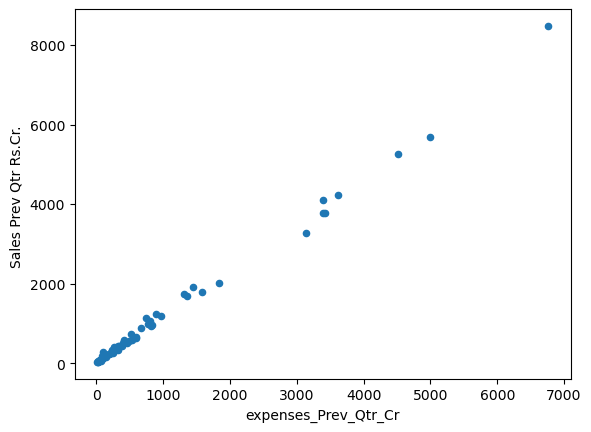

In [21]:
##variation of sales against expenses
featured_data.plot.scatter('expenses_Prev_Qtr_Cr','Sales Prev Qtr Rs.Cr. ')

##### with increase in the sales, additional expenses will be needed, so both are varying nearly linear

### To get a better fit expression for target Sales in this quarter, will be plotting the variation against multiple derived inputs(past quarters), below:

<Axes: ylabel='Sales Qtr Rs.Cr. '>

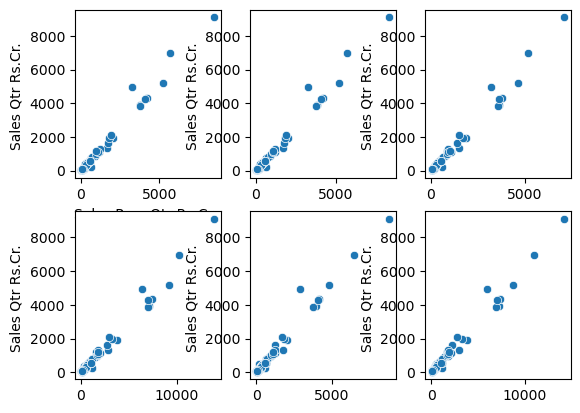

In [22]:
f,ax= plt.subplots(2,3)
sns.scatterplot(data=featured_data,x='Sales Prev Qtr Rs.Cr. ',y='Sales Qtr Rs.Cr. ',ax=ax[0,0])
sns.scatterplot(x=(featured_data['Sales Prev Qtr Rs.Cr. ']-featured_data['other_effect_Prev_Qtr_Cr']),y=featured_data['Sales Qtr Rs.Cr. '],ax=ax[0,1])
sns.scatterplot(x=(featured_data['Sales Prev Qtr Rs.Cr. ']-featured_data['other_effect_Prev_Qtr_Cr']-featured_data['NP Prev Qtr Rs.Cr. ']),y=featured_data['Sales Qtr Rs.Cr. '],ax=ax[0,2])
sns.scatterplot(x=(featured_data['Sales Prev Qtr Rs.Cr. ']-featured_data['other_effect_Prev_Qtr_Cr']-featured_data['NP Prev Qtr Rs.Cr. ']+featured_data['expenses_Prev_Qtr_Cr']),y=featured_data['Sales Qtr Rs.Cr. '],ax=ax[1,0])
sns.scatterplot(x=(featured_data['Sales Prev Qtr Rs.Cr. ']+featured_data['Sales 2Qtr Bk Rs.Cr. ']+featured_data['Sales 3Qtr Bk Rs.Cr. '])/3,y=featured_data['Sales Qtr Rs.Cr. '],ax=ax[1,1])
sns.scatterplot(x=((featured_data['Sales Prev Qtr Rs.Cr. ']+featured_data['Sales 2Qtr Bk Rs.Cr. ']+featured_data['Sales 3Qtr Bk Rs.Cr. '])/3\
                -featured_data['other_effect_Prev_Qtr_Cr']-featured_data['NP Prev Qtr Rs.Cr. ']+featured_data['expenses_Prev_Qtr_Cr'])
                ,y=featured_data['Sales Qtr Rs.Cr. '],ax=ax[1,2])

###### with above plots, relation ship b/w current sales and previous sales nd other parameters varies linearly

### Validating results using linear model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
#to set target variable and features 
#loading the X(input features) with all the features other than the data from current quarter, by dropping it and loading
#loading target(sales of current quarter) as target
X = featured_data.drop(['Sales Qtr Rs.Cr. ','Name','NP Qtr Rs.Cr. ','OP Qtr Rs.Cr. ','other_effect_Qtr_Cr','expenses_Qtr_Cr'],axis=1)
y = featured_data['Sales Qtr Rs.Cr. ']

In [25]:
linear_model = LinearRegression()
model = linear_model.fit(X,y)
output = model.predict(X)

In [26]:
##comparing the actual output against expected output
pd.DataFrame({'predicted':output,'actuals':y})

,predicted,actuals
0,529.880284,468.57
1,255.865150,150.06
2,366.218343,282.47
3,78.163983,62.96
4,327.229493,303.14
...,...,...
69,96.590746,80.15
70,114.963496,124.62
71,74.515244,71.77
72,604.023951,577.54


In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_squared_error(y, output,squared=False)

152.168740574508

In [29]:
mean_absolute_error(y, output)

91.78277560117037

#### now we have got the mean error, next will be trying to reduce the error integrating with realtime data